# Parkinsons Disease Prediction with SVM

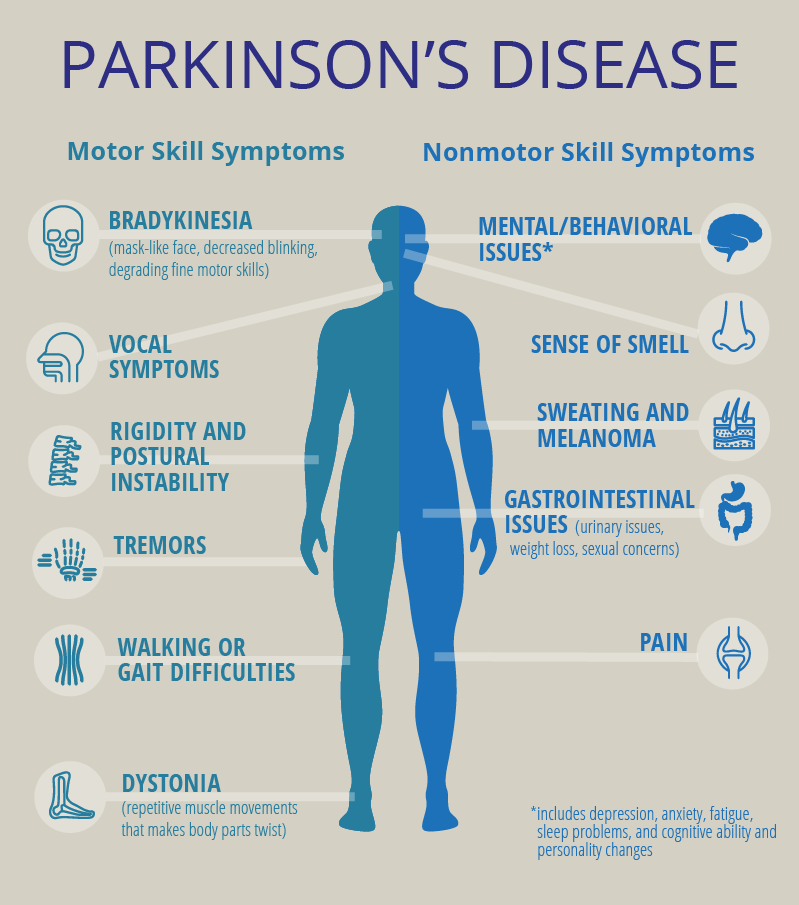

### Data Set Information:

This dataset is composed of a range of `biomedical voice measurements from
31 people`, `23 with Parkinson's disease (PD)`. Each column in the table is a
particular voice measure, and each row corresponds one of 195 voice
recording from these individuals ("name" column). The main aim of the data
is to discriminate healthy people from those with PD, according to "status"
column which is set to 0 for healthy and 1 for PD.  

The data is in ASCII CSV format. `The rows of the CSV file contain an
instance corresponding to **one voice recording**.` There are around **six
recordings per patient**, the name of the patient is identified in the first
column.For further information or to pass on comments, please contact Max
Little (littlem '@' robots.ox.ac.uk).  

Further details are contained in the following reference -- if you use this
dataset, please cite:  
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008),
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease',
IEEE Transactions on Biomedical Engineering (to appear).



### Attribute Information:

Matrix column entries (attributes):  
**name** - ASCII subject name and recording number  
**MDVP:Fo(Hz)** - Average vocal fundamental frequency  
**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency  
**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency  

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several  
measures of variation in fundamental frequency  
**MDVP:Shimmer**,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude  
**NHR,HNR** - Two measures of ratio of noise to tonal components in the voice  
**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy  
**RPDE,D2** - Two nonlinear dynamical complexity measures  
**DFA **- Signal fractal scaling exponent  
**spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation  

#### Target column > **status**

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column', None)

/kaggle/input/parkinsons-data-set/parkinsons.names
/kaggle/input/parkinsons-data-set/parkinsons.data


In [2]:
'''df_names = pd.read_csv('/kaggle/input/parkinsons-data-set/parkinsons.names')
display(df_names)
print()'''
df= pd.read_csv('/kaggle/input/parkinsons-data-set/parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

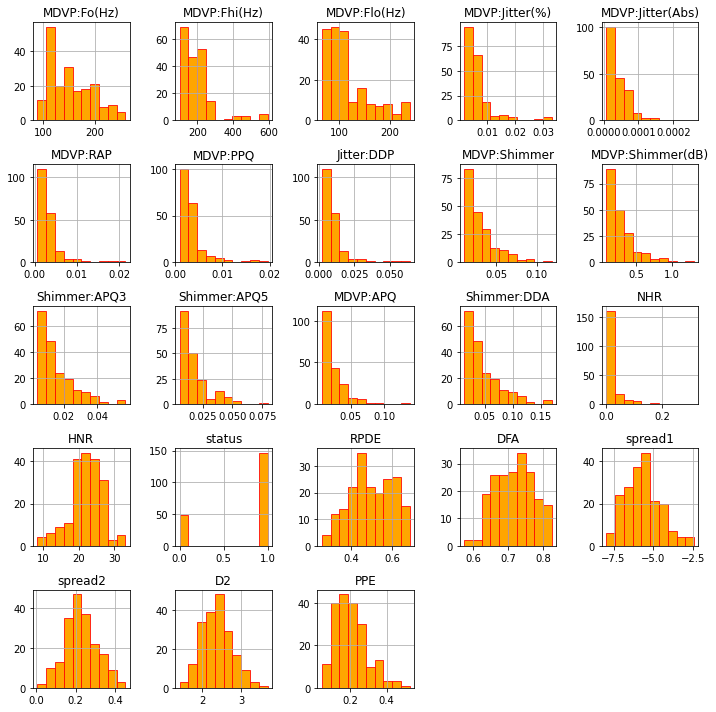

In [5]:
df.hist(figsize=(10,10), color='orange',edgecolor='red', linewidth=0.8);
plt.tight_layout()

<AxesSubplot:>

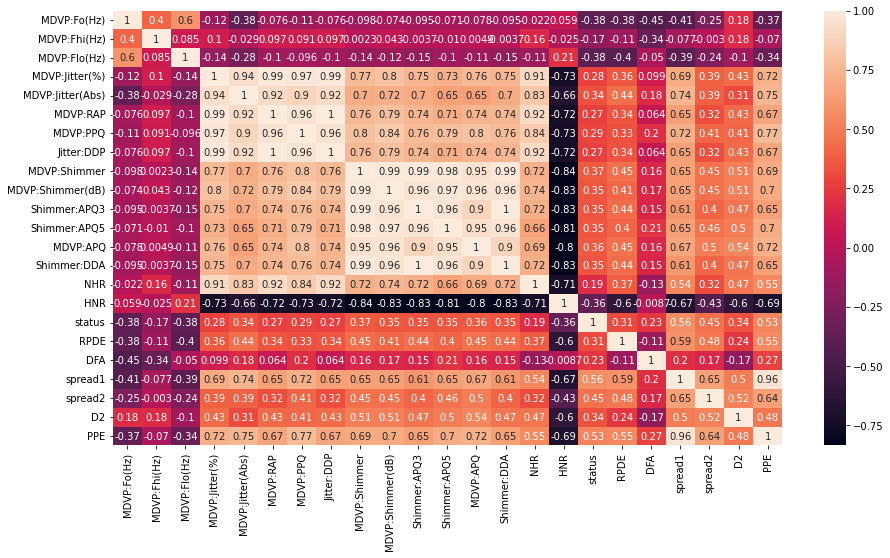

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [7]:
################---- Group the data based on the target variable ----#################

df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# Data Preprocessing 

In [8]:
# Droping Name column ...
df.drop('name', axis=1, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X= df.drop('status', axis=1)
y= df['status']

In [11]:
#### Train Split the data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [12]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train:  (156, 22)
Shape of X_test :  (39, 22)
Shape of y_train:  (156,)
Shape of y_test :  (39,)


### Feature Scaling : Data Standardization

* Standardized values are useful for tracking data that isn’t easy to compare otherwise.

In [13]:
scaler= StandardScaler()

In [14]:
scaler.fit(X_train)

StandardScaler()

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling


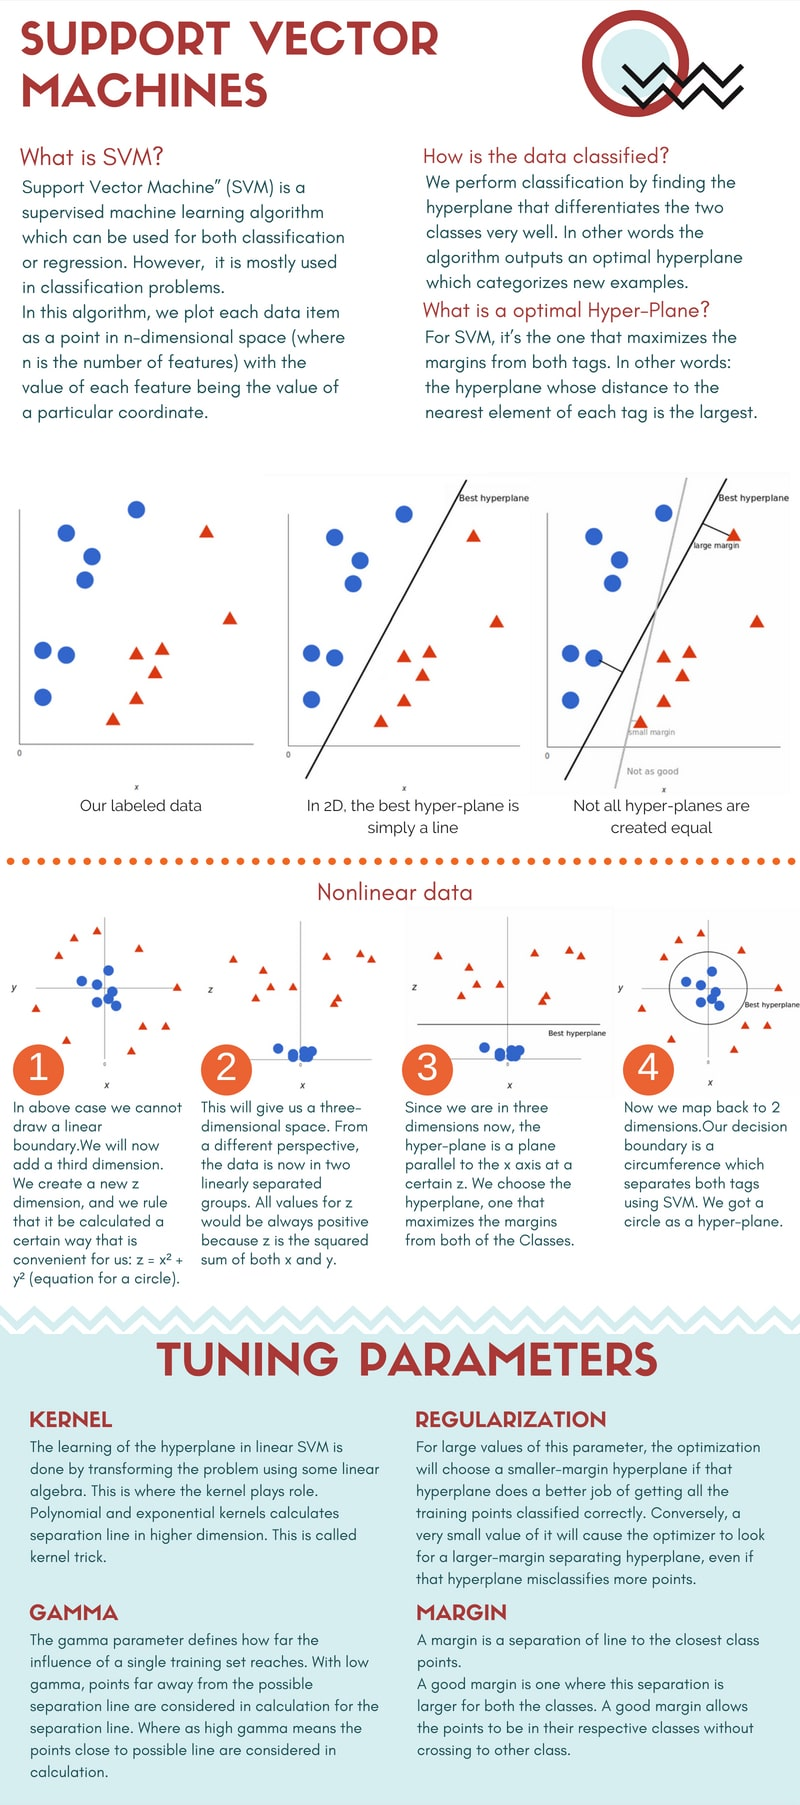|

In [16]:
from sklearn import svm
from sklearn.metrics import accuracy_score

### Manually performing hyperparameter 

In [17]:
%%time
### Model 0 kernel = linear 
model = svm.LinearSVR(epsilon=1.5)

# training the SVM model with training data
model.fit(X_train, y_train)

# Model Evaluation
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy,'\n')

Accuracy score of training data :  0.26282051282051283 

CPU times: user 3.18 ms, sys: 19 µs, total: 3.2 ms
Wall time: 2.88 ms


In [18]:
%%time
### Model 1 kernel = linear 
model = svm.SVC(kernel='linear')

# training the SVM model with training data
model.fit(X_train, y_train)

# Model Evaluation
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy,'\n')

Accuracy score of training data :  0.9166666666666666 

CPU times: user 4.6 ms, sys: 845 µs, total: 5.44 ms
Wall time: 4.34 ms


In [19]:
%%time
### Model_poly----####---Polynomial Kernel--################

model_poly = svm.SVC(kernel='poly', degree=3, coef0=1, C=5)

# training the SVM model with training data
model_poly.fit(X_train, y_train)

# Model Evaluation
# accuracy score on training data
X_train_prediction = model_poly.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data Using Polynomial Kernel : ', training_data_accuracy,'\n')

Accuracy score of training data Using Polynomial Kernel :  0.9871794871794872 

CPU times: user 4.34 ms, sys: 0 ns, total: 4.34 ms
Wall time: 4.35 ms


It makes it possible to get the same result as if you added many polynomial features, even with very highdegree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since you don’t actually add any features
* This code trains an SVM classifier using a **3rd-degree polynomial kernel**.
* On the right is another SVM classifier using a 10thdegree polynomial kernel. Obviously, if your model is overfitting, you might want to reduce the polynomial degree.
* Conversely, if it is underfitting, you can try increasing it. The hyperparameter coef0 controls how much the model is influenced by highdegree polynomials versus low-degree polynomials.

In [20]:
%%time
##################---- Gaussian RBF kernel using the SVC class:----#############
model_RBF = svm.SVC(kernel="rbf", gamma=5, C=0.001)

# training the SVM model with training data
model_RBF.fit(X_train, y_train)

# Model Evaluation
# accuracy score on training data
X_train_prediction = model_RBF.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data Using Gaussian RBF kernel : ', training_data_accuracy,'\n')

Accuracy score of training data Using Gaussian RBF kernel :  0.7371794871794872 

CPU times: user 5.17 ms, sys: 801 µs, total: 5.97 ms
Wall time: 5.77 ms


## Gaussian Radial Basis Function (RBF)
ϕγ (x, ℓ) = exp −(γ∥ x − ℓ ∥2)
It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).    
Now we are ready to compute the new features. For example, let’s look
at the instance x1 = –1: it is located at a distance of 1 from the first landmark, and 2
from the second landmark.   
Therefore its `new features are x2 = exp (–0.3 × 12) ≈ 0.74 and x3 = exp (–0.3 × 22) ≈ 0.30.` 
### models trained with different values of **hyperparameters gamma (γ)** and **C**. 
* Increasing gamma makes the **bell-shape curve narrower**
* Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother
* **γ acts like a regularization hyperparameter**: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it


## Building a Predictive System

In [21]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease
